In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
file_path='Objective_Function/objective_'
df_fixed_evs_ahe = pd.read_csv(file_path+'Fixed_EVs_AHE.csv')
df_fixed_pvs_ahe = pd.read_csv(file_path+'Fixed_PVs_AHE.csv')

df_fixed_evs_diag = pd.read_csv(file_path+'Fixed_EVs_DIAG.csv')
df_fixed_pvs_diag = pd.read_csv(file_path+'Fixed_PVs_DIAG.csv')

df_mixed_ahe=  pd.read_csv(file_path+'mixed_AHE.csv')
df_mixed_diag =  pd.read_csv(file_path+'mixed_DIAG.csv')

## A) Examin fixed PVs scenario

<AxesSubplot:>

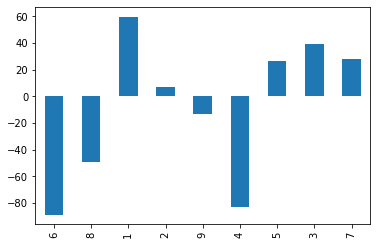

In [21]:
df_fixed_pvs_ahe.mean().plot(kind='bar')

<AxesSubplot:>

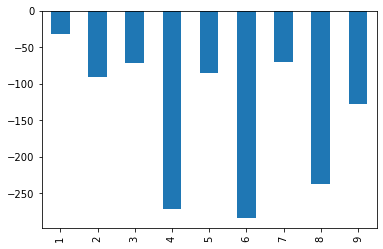

In [22]:
df_fixed_pvs_diag.mean().plot(kind='bar')

There is minus average in Diagonalization algorithm. It took 300 iterations and didn't reach to epsilon equilibrium.

Lets compae the two algorithms last results.

Text(0, 0.5, 'Net Cost')

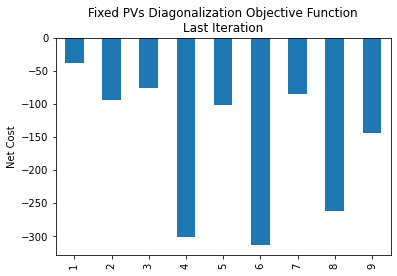

In [23]:
ax = df_fixed_pvs_diag.iloc[-1].plot(kind='bar')
ax.set_title('Fixed PVs Diagonalization Objective Function\nLast Iteration')
ax.set_ylabel('Net Cost')

Text(0, 0.5, 'Net Cost')

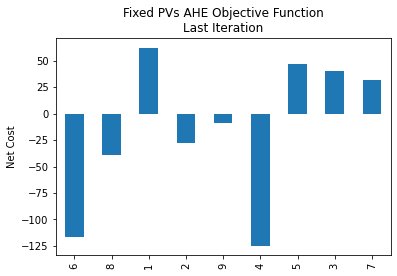

In [24]:
ax = df_fixed_pvs_ahe.iloc[-1].plot(kind='bar')
ax.set_title('Fixed PVs AHE Objective Function\nLast Iteration')
ax.set_ylabel('Net Cost')

## B) Examining Fixed EVs scenarios

In [25]:
df_fixed_evs_ahe.replace(1000000,np.nan,inplace=True)
df_fixed_evs_ahe = df_fixed_evs_ahe.fillna(method='ffill')

In [26]:
df_fixed_evs_ahe = df_fixed_evs_ahe.fillna(method='bfill')

<AxesSubplot:>

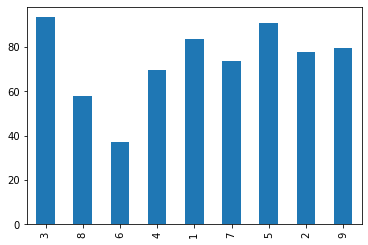

In [27]:
df_fixed_evs_ahe.mean().plot(kind='bar')

<AxesSubplot:>

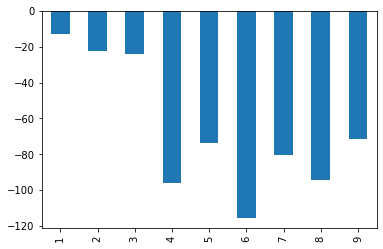

In [28]:
df_fixed_evs_diag.mean().plot(kind='bar')

### B.1) Checking the last bids for both algorithms

Text(0, 0.5, 'Net Cost')

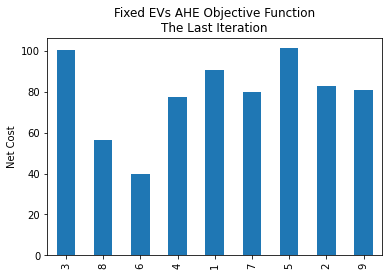

In [29]:
ax = df_fixed_evs_ahe.iloc[-1].plot(kind='bar')
ax.set_title('Fixed EVs AHE Objective Function\nThe Last Iteration')
ax.set_ylabel('Net Cost')

Text(0, 0.5, 'Net Cost')

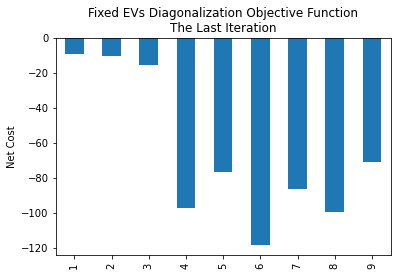

In [30]:
ax = df_fixed_evs_diag.iloc[-1].plot(kind='bar')
ax.set_title('Fixed EVs Diagonalization Objective Function\nThe Last Iteration')
ax.set_ylabel('Net Cost')

## C) Examining Mixed Scenario

Text(0.5, 0, 'Strategic DAs')

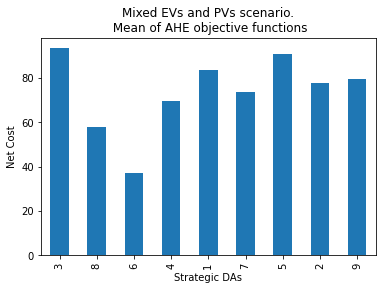

In [31]:
df_mixed_ahe.replace(1000000,np.nan,inplace=True)
df_mixed_ahe = df_mixed_ahe.fillna(method='ffill')
ax = df_mixed_ahe.mean().plot(kind='bar')
ax.set_title('Mixed EVs and PVs scenario.\n Mean of AHE objective functions')
ax.set_ylabel('Net Cost')
ax.set_xlabel('Strategic DAs')

#### Wrong Dataset
df_mixed_diag should be fixed for further examinations

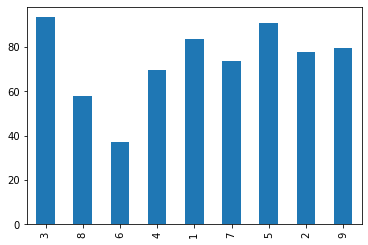

In [32]:
df_mixed_diag.replace(1000000,np.nan,inplace=True)
df_mixed_diag = df_mixed_diag.fillna(method='ffill')
ax = df_mixed_diag.mean().plot(kind='bar')

# Comparing Algorithms results for three scenario in one place


In [40]:
Mean=[]
Algorithm=[]
Scenario=[]
DA=[]

In [41]:
# Mixed Algorithms
for x in zip(df_mixed_diag.mean().index, df_mixed_diag.mean()):
    Mean.append(x[1])
    DA.append(x[0])
    Algorithm.append('DIAG')
    Scenario.append('mixed')

for x in zip(df_mixed_ahe.mean().index, df_mixed_ahe.mean()):
    Mean.append(x[1])
    DA.append(x[0])
    Algorithm.append('AHE')
    Scenario.append('mixed')

In [42]:
# Fixed PVs Algorithms
for x in zip(df_fixed_pvs_diag.mean().index, df_fixed_pvs_diag.mean()):
    Mean.append(x[1])
    DA.append(x[0])
    Algorithm.append('DIAG')
    Scenario.append('Fixed_PVs')

for x in zip(df_fixed_pvs_ahe.mean().index, df_fixed_pvs_ahe.mean()):
    Mean.append(x[1])
    DA.append(x[0])
    Algorithm.append('AHE')
    Scenario.append('Fixed_PVs')

In [43]:
# Fixed EVs Algorithms
for x in zip(df_fixed_evs_diag.mean().index, df_fixed_evs_diag.mean()):
    Mean.append(x[1])
    DA.append(x[0])
    Algorithm.append('DIAG')
    Scenario.append('Fixed_EVs')

for x in zip(df_fixed_evs_ahe.mean().index, df_fixed_evs_ahe.mean()):
    Mean.append(x[1])
    DA.append(x[0])
    Algorithm.append('AHE')
    Scenario.append('Fixed_EVs')

In [59]:
# Create Data Frame from multiple lists
df_compare = pd.DataFrame({'Mean':Mean, 'Algorithm':Algorithm, 'Scenario':Scenario, 'DA':DA})

In [51]:
df_compare = df_compare.groupby(['Scenario','DA']).mean().reset_index()

In [55]:
df_compare

,Scenario,DA,Mean
0,Fixed_EVs,1,35.489282
1,Fixed_EVs,2,27.699354
2,Fixed_EVs,3,34.812269
3,Fixed_EVs,4,-13.218840
4,Fixed_EVs,5,8.678757
5,Fixed_EVs,6,-39.099001
6,Fixed_EVs,7,-3.449639
7,Fixed_EVs,8,-18.290768
8,Fixed_EVs,9,4.111335
9,Fixed_PVs,1,14.270106


In [52]:
import seaborn as sns

<AxesSubplot:xlabel='Scenario', ylabel='Mean'>

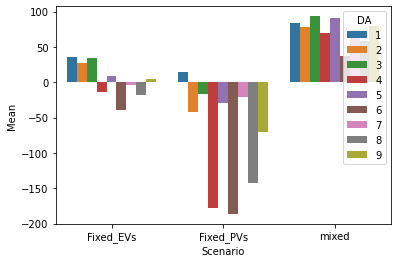

In [60]:
sns.barplot(x='Scenario',y='Mean', hue='DA', data=df_compare.groupby(['Scenario','DA']).mean().reset_index() )

<AxesSubplot:xlabel='Scenario', ylabel='Mean'>

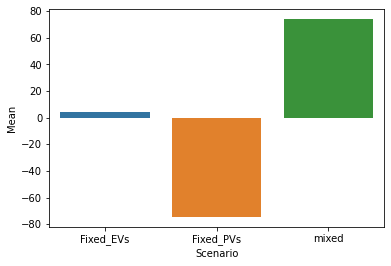

In [63]:
sns.barplot(x='Scenario',y='Mean',  data=df_compare.groupby(['Scenario']).mean().reset_index() )

In [62]:
df_compare.groupby(['Scenario']).mean().reset_index()

,Scenario,Mean
0,Fixed_EVs,4.081417
1,Fixed_PVs,-74.548510
2,mixed,73.793848
